In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# convert MNIST image files into a Tensor of 4-Dimensions (number of images, Height, Width, Color channel)
transform = transforms.ToTensor()

In [3]:
# Train Data
train_data = datasets.MNIST(root='cnn_data', train=True, download=True, transform=transform)

# Test Data
test_data = datasets.MNIST(root='cnn_data', train=False, download=True, transform=transform)

# create a small batch size for images
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 136MB/s]


Extracting cnn_data/MNIST/raw/train-images-idx3-ubyte.gz to cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 16.5MB/s]

Extracting cnn_data/MNIST/raw/train-labels-idx1-ubyte.gz to cnn_data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 55.3MB/s]

Extracting cnn_data/MNIST/raw/t10k-images-idx3-ubyte.gz to cnn_data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.11MB/s]

Extracting cnn_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to cnn_data/MNIST/raw



In [4]:
# Model Class
class CNNModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 6, 3, 1)
    self.conv2 = nn.Conv2d(6, 16, 3, 1)
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2, 2,)
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X, 2, 2)

    X = X.view(-1, 5*5*16)
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X, dim=1)


In [5]:
model = CNNModel()
model

CNNModel(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [6]:
# Loss function Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [7]:
import time
start_time = time.time()

# create variales to track things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# for loop of epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  # Train
  for b,(X_train, y_train) in enumerate(train_loader):
    b+=1 # start our batches at 1
    y_pred = model(X_train) # Not flattened, it's 2d
    loss = criterion(y_pred, y_train)

    predicted = torch.max(y_pred.data, 1)[1] # add up the number of correct predictions. Index of the first point
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr

    # update our variables
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # print out some results
    if b%600 == 0:
      print(f'epoch: {i}  Batch: {b}  Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)

  # Test
  with torch.no_grad():
    for b,(X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1]
      tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)



current_time = time.time()
total_time = current_time - start_time
print(f'Training took: {total_time/60} minutes!')

epoch: 0  Batch: 600  Loss: 0.5277493000030518
epoch: 0  Batch: 1200  Loss: 0.012216173112392426
epoch: 0  Batch: 1800  Loss: 0.010158664546906948
epoch: 0  Batch: 2400  Loss: 0.48903289437294006
epoch: 0  Batch: 3000  Loss: 0.015824856236577034
epoch: 0  Batch: 3600  Loss: 0.03518856689333916
epoch: 0  Batch: 4200  Loss: 0.011955896392464638
epoch: 0  Batch: 4800  Loss: 0.0007595928618684411
epoch: 0  Batch: 5400  Loss: 0.007070614956319332
epoch: 0  Batch: 6000  Loss: 0.0017296401783823967
epoch: 1  Batch: 600  Loss: 0.0039894115179777145
epoch: 1  Batch: 1200  Loss: 0.0006416155374608934
epoch: 1  Batch: 1800  Loss: 0.006629485636949539
epoch: 1  Batch: 2400  Loss: 0.002137626986950636
epoch: 1  Batch: 3000  Loss: 0.005132075399160385
epoch: 1  Batch: 3600  Loss: 0.005586407613009214
epoch: 1  Batch: 4200  Loss: 0.0021064525935798883
epoch: 1  Batch: 4800  Loss: 0.01720857247710228
epoch: 1  Batch: 5400  Loss: 0.24706879258155823
epoch: 1  Batch: 6000  Loss: 0.25813108682632446
epoc

In [8]:
train_losses = [tl.item() for tl in train_losses]

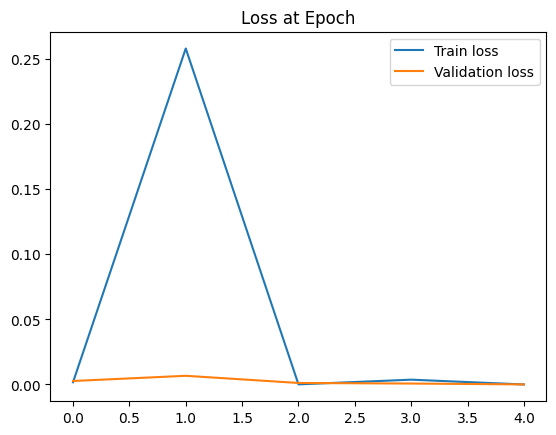

In [9]:
plt.plot(train_losses, label='Train loss')
plt.plot(test_losses, label='Validation loss')
plt.title('Loss at Epoch')
plt.legend()

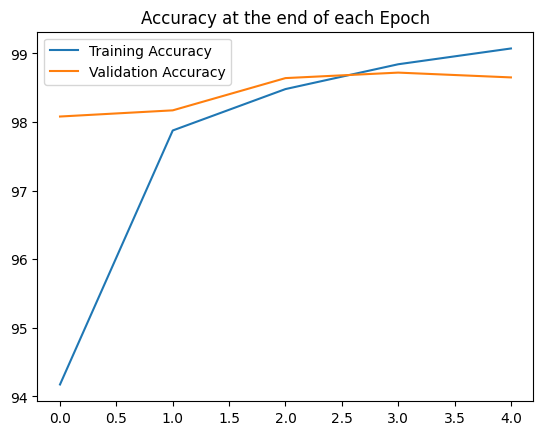

In [10]:
# graph the accuracy at the end of each epoch
plt.plot([t/600 for t in train_correct], label='Training Accuracy')
plt.plot([t/100 for t in test_correct], label='Validation Accuracy')
plt.title("Accuracy at the end of each Epoch")
plt.legend()

In [11]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()

correct.item()/len(test_data)*100

98.65